# Анализ множественных прогонов нейросети для модели Крюков-Шолохов

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import glob
import os

%matplotlib inline

%run main_serv.py
auth_load=authors.copy()

      file_mask  fire  in_use    strFileDir       strRuName  \
index                                                         
kru           *     0    True        Krukov       Ф. Крюков   
sho       *.txt     0    True     Sholokhov      М. Шолохов   
ltol          *     0    True       Tolstoy      Л. Толстой   
atol      *.txt     0    True      ATolstoy      A. Толстой   
sera      *.txt     0    True  Serafimovich  А. Серафимович   
fad       *.txt     0    True       Fadeyev       А. Фадеев   
bab       *.txt     0    True         Babel       И. Бабель   
kat       *.txt     0    True        Kataev       В. Катаев   
pla       *.txt     0    True      Platonov     А. Платонов   
blg       *.txt     0    True      Bulgakov     М. Булгаков   

                                    strUrl  
index                                       
kru        http://az.lib.ru/k/krjukow_f_d/  
sho      http://www.lib.ru/PROZA/SHOLOHOW/  
ltol                                        
atol              

## Filter result files (jnly selected authors)

In [29]:
res_list=['result/lt1', 
          'result/f1', 
          'result/ga1', 
          'result/ilf1', 
          'result/ka1', 
          'result/mm', 
          'result/o1',
          'result/pa1', 
          'result/pl1', 
          'result/TD']
strResultDir=res_list[9]

#auth_load.use(val=False)
#auth_load.use(index=['sera', 'fad', 'kru', 'sho', 'ltol', 'kat', 'pla']) # load these authors

work_list=auth_load.loc[auth_load['in_use'], 'strFileDir'].tolist()

csvs=[fl for fl in glob.glob(os.path.join(strResultDir,'*.csv')) if re.search('result_prob_', fl)]
work_au=[re.search('result_prob_(\w+).csv', auth).group(1) for auth in csvs]
work_dict=dict(zip(work_au, csvs))
work_dict=dict(filter(lambda x: x[0] in work_list, work_dict.items()))
print(work_dict)

{'Babel': 'result/TD/result_prob_Babel.csv', 'Serafimovich': 'result/TD/result_prob_Serafimovich.csv', 'Tolstoy': 'result/TD/result_prob_Tolstoy.csv', 'Platonov': 'result/TD/result_prob_Platonov.csv', 'Sholokhov': 'result/TD/result_prob_Sholokhov.csv', 'Fadeyev': 'result/TD/result_prob_Fadeyev.csv', 'Bulgakov': 'result/TD/result_prob_Bulgakov.csv', 'Kataev': 'result/TD/result_prob_Kataev.csv', 'Krukov': 'result/TD/result_prob_Krukov.csv'}


## Load and prepare data

"Среднее выборок приблизительно равно среднему популяции" - в каждом результирующем файле по каждомуавторурезультат 13-циклов обучение-классификация нейросети, считаем среднее по главам, смотрим всякую статистику

In [30]:
dict_pdf={k:pd.read_csv(v, sep=';') for k, v in work_dict.items()}

prob_cols=[c for c in dict_pdf[work_au[0]].columns.tolist() if re.search('(?i)prob', c)]
plot_list=[]
for k, v in dict_pdf.items():
    print(k, v.shape)
    v[k]=v.mean(axis=1)
    draw_cols=[c for c in v.columns.tolist() if not re.search('(?i)prob', c)]
    plot_list.append(v[draw_cols].set_index(['name', 'short_text']))

Babel (168, 3)
Serafimovich (168, 3)
Tolstoy (168, 3)
Platonov (168, 3)
Sholokhov (168, 3)
Fadeyev (168, 3)
Bulgakov (168, 3)
Kataev (168, 3)
Krukov (168, 3)


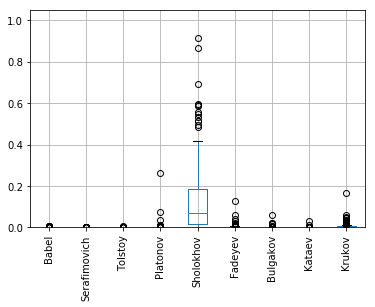

,Babel,Serafimovich,Tolstoy,Platonov,Sholokhov,Fadeyev,Bulgakov,Kataev,Krukov
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.000722,0.000515,0.000329,0.003572,0.138828,0.004603,0.001442,0.000777,0.006679
std,0.001156,0.000589,0.000652,0.021314,0.175996,0.011916,0.005181,0.002555,0.015550
min,0.000073,0.000104,0.000043,0.000107,0.000381,0.000118,0.000035,0.000043,0.000239
25%,0.000221,0.000212,0.000093,0.000327,0.018788,0.000683,0.000202,0.000163,0.001138
50%,0.000390,0.000319,0.000140,0.000679,0.069505,0.001291,0.000358,0.000284,0.002066
75%,0.000704,0.000565,0.000262,0.001477,0.185402,0.003339,0.001062,0.000547,0.005548
max,0.009053,0.003738,0.005417,0.264639,0.913876,0.127245,0.057712,0.030015,0.164781


In [31]:
fig, ax=plt.subplots()

pdf_result=plot_list[0].join(plot_list[1:])

box=pdf_result.boxplot(rot=90, ax=ax);
#ax.margins(y=0.05)
ax.set_ylim([0,1.05])
plt.show();
pdf_result.describe()

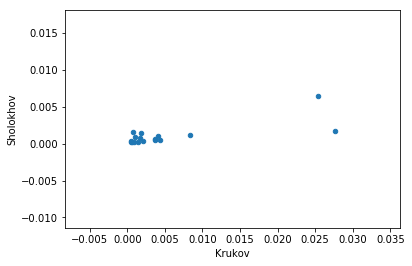

In [36]:
ax=pdf_result[['Krukov', 'Sholokhov']].plot.scatter(x='Krukov', y='Sholokhov')


In [13]:
pdf_result['Serafimovich'].idxmax()

('Последний из удэге_112', nan)

In [7]:
pdf_fad=dict_pdf['Fadeyev']
pdf_fad.loc[pdf_fad['Fadeyev']>0.2]

,name,short_text,prob2_0,prob2_1,prob2_2,prob2_3,prob2_4,prob2_5,prob2_6,prob2_7,prob2_8,prob2_9,prob2_10,prob2_11,prob2_12,Fadeyev
2,Последний из удэге_70,"Умывшись в баньке, перекусив и надев чистую го...",0.273196,0.215644,0.228953,0.185599,0.180940,0.269703,0.204071,0.247498,0.149335,0.260903,0.207446,0.154693,0.193871,0.213219
3,Последний из удэге_140,"Народ кочевал по стране, могущей вместить семь...",0.363914,0.372923,0.344622,0.282736,0.345573,0.426997,0.275559,0.310436,0.292982,0.288775,0.227858,0.279758,0.330391,0.318656
17,Последний из удэге_5,"Под самой Ольгой, возле листвяного шалаша, еще...",0.429942,0.485126,0.494391,0.434897,0.355574,0.430844,0.388528,0.452011,0.410983,0.411070,0.397563,0.295256,0.428822,0.416539
32,Последний из удэге_60,Сеня впервые так близко столкнулся с хунхузами...,0.229984,0.220000,0.306148,0.174985,0.223362,0.284723,0.100379,0.220992,0.191728,0.184600,0.210570,0.198946,0.267397,0.216447
33,Последний из удэге_63,Было уже около полуночи; в тайге все стихло; п...,0.488209,0.521031,0.450197,0.245330,0.408315,0.498020,0.237555,0.406790,0.378606,0.400268,0.455613,0.335343,0.418148,0.403341
35,Последний из удэге_109,"Отправив Петра с обозом раненых в Скобеевку, А...",0.267917,0.276226,0.339400,0.306827,0.325136,0.339781,0.195229,0.319337,0.260721,0.262328,0.281066,0.304677,0.323982,0.292510
36,Последний из удэге_4,"Перевал далеко уже остался за их спиной, когда...",0.309282,0.329347,0.370682,0.325441,0.284421,0.361772,0.249971,0.235765,0.304782,0.235068,0.326038,0.267318,0.265122,0.297308
37,Один в чаще_2,"Утреннее, нарочито веселое настроение долго не...",0.116152,0.998649,0.101496,0.998569,0.998838,0.998719,0.998827,0.998699,0.092191,0.104724,0.998520,0.998424,0.998208,0.723232
39,Землетрясение_1,"В 1920 году по условиям перемирия, заключенног...",0.497233,0.333014,0.998559,0.998412,0.999305,0.999025,0.998802,0.998725,0.998572,0.997805,0.998642,0.997465,0.501577,0.870549
41,Последний из удэге_59,Отряд Гладких уже третий день продвигался по т...,0.470055,0.555000,0.600098,0.599232,0.438179,0.613742,0.421347,0.484659,0.512970,0.469848,0.446683,0.330417,0.483050,0.494252


In [9]:
pdf_sho=dict_pdf['Tolstoy']
pdf_sho.loc[pdf_sho['Tolstoy']>0.4]

,name,short_text,prob2_0,prob2_1,prob2_2,prob2_3,prob2_4,prob2_5,prob2_6,prob2_7,prob2_8,prob2_9,prob2_10,prob2_11,prob2_12,Tolstoy
13,Последний из удэге_117,"Наскоро позавтракав на кухне, Сережа в том же ...",0.640978,0.640324,0.540497,0.495958,0.615363,0.576789,0.628439,0.591629,0.627484,0.564495,0.597459,0.715860,0.572154,0.600571
15,Последний из удэге_96,В мрачном настроении вернулся он к себе на ква...,0.548180,0.523730,0.500449,0.401468,0.410529,0.416710,0.483210,0.479547,0.417240,0.408134,0.405588,0.515800,0.446435,0.458232
16,Последний из удэге_13,Теплым беззвездным вечером начала сентября мал...,0.461424,0.578859,0.427114,0.416478,0.408664,0.394787,0.431513,0.449185,0.457189,0.465326,0.462401,0.496074,0.330627,0.444588
21,Последний из удэге_31,"Ланговой часто исчезал, домой возвращался позд...",0.671536,0.642699,0.650204,0.569178,0.630821,0.647872,0.657467,0.659464,0.653107,0.665261,0.637280,0.696216,0.661315,0.649417
25,Последний из удэге_17,"К тому времени, когда Лена была привезена к Ги...",0.570261,0.461655,0.483575,0.341460,0.422468,0.453456,0.498463,0.437442,0.475989,0.476296,0.464406,0.585603,0.423309,0.468799
67,Последний из удэге_18,"Молодое растение, несущее в себе возможность р...",0.672415,0.646130,0.559051,0.473746,0.614609,0.591140,0.581222,0.600279,0.590417,0.600124,0.547749,0.686771,0.571692,0.595026
74,Последний из удэге_111,"- Уже несколько недель, как я не сплю ночами и...",0.520127,0.592299,0.508275,0.447294,0.465622,0.431490,0.496585,0.495436,0.488221,0.530846,0.479287,0.543680,0.488695,0.499066
79,Последний из удэге_14,По деревенской привычке Лена проснулась очень ...,0.540636,0.517497,0.428415,0.468981,0.473603,0.455584,0.475155,0.445423,0.527738,0.490452,0.485742,0.488756,0.416366,0.478027
81,Последний из удэге_116,Вдоль по гребню отрога и по верхушкам деревьев...,0.523268,0.554297,0.456208,0.438825,0.548187,0.510264,0.501786,0.469468,0.496183,0.512393,0.454081,0.490839,0.498254,0.496466
97,Последний из удэге_15,После завтрака Лиза и Адочка ушли в гимназию. ...,0.811026,0.833755,0.743853,0.627352,0.709091,0.705079,0.686929,0.787481,0.734441,0.758334,0.745114,0.768204,0.733032,0.741822
